# Assignment 1 Overview

According to assignment specification, in this assignment, we will develop Python code to classify `Sneakers` versus `Sandals` using the Fashion-MNIST dataset by using logistic regression and k-NN classifiers. We will use Grid Search and cross-validation to find the optimal hyperparameters of the model (e.g., the regularisation hyperparameter) and discuss and interpret the different decisions and their impact on the model’s performance and interpretability.


# Get the Data

"Fashion-MNIST is a dataset motivated by the popular MNIST dataset used to classify handwritten digits. It contains examples of ten classes (e.g. sneakers, coats, sandals, trousers, pullovers, etc.). Fashion-MNIST has a training set with 60,000 examples and a test set with 10,000 examples. Each example is a 28 x 28 low-resolution and grayscale image (similar to the examples in MNIST) associated with a label from one of the ten classes."


## Load the Data


In [67]:
from pathlib import Path
import pandas as pd

train_set = pd.read_csv(Path("FMNIST_training_set.csv"), header=None)
test_set = pd.read_csv(Path("FMNIST_test_set.csv"), header=None)
train_labels = pd.read_csv(Path("FMNIST_training_set_labels.csv"), header=None)
test_labels = pd.read_csv(Path("FMNIST_test_set_labels.csv"), header=None)

## Take a Quick Look at the Data Structure


In [68]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 358.9 MB


In [69]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filtering out "Sneakers" and "Sandals" Only


In [70]:
SNEAKER = 7
SANDAL = 5


def filter_data(labels, dataset):
    mask = labels.iloc[:, 0].isin([SNEAKER, SANDAL])
    labels_filtered = labels[mask]
    # Replace 5 with 1, replace 7 with 0
    labels_filtered = labels_filtered.iloc[:, 0].replace({5: 1, 7: 0})
    dataset_filtered = dataset[mask]
    return labels_filtered, dataset_filtered


# For the training data
train_labels, train_set = filter_data(
    train_labels, train_set)

# For the test data
test_labels, test_set = filter_data(test_labels, test_set)

## Task D1


In [71]:
# Get the number of intances in the training set and test set
nrows_train_set = len(train_set)
nrows_test_set = len(test_set)
total_instances = nrows_train_set + nrows_test_set
print('The number of intances in the training set:', nrows_train_set)
print('The number of intances in the test set:', nrows_test_set)
print('The total number of instances:', total_instances)

The number of intances in the training set: 11988
The number of intances in the test set: 2000
The total number of instances: 13988


In [72]:
test_labels

8       1
9       0
11      1
12      0
21      1
       ..
9976    1
9986    0
9987    1
9990    1
9999    1
Name: 0, Length: 2000, dtype: int64

In [73]:
test_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,80,77,0,0,0


In [74]:
train_labels

12       1
30       1
36       1
41       0
43       1
        ..
59979    0
59983    1
59992    0
59995    1
59999    1
Name: 0, Length: 11988, dtype: int64

In [75]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,65,53,45,33,17,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task D2


In [76]:
# Configure save image
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

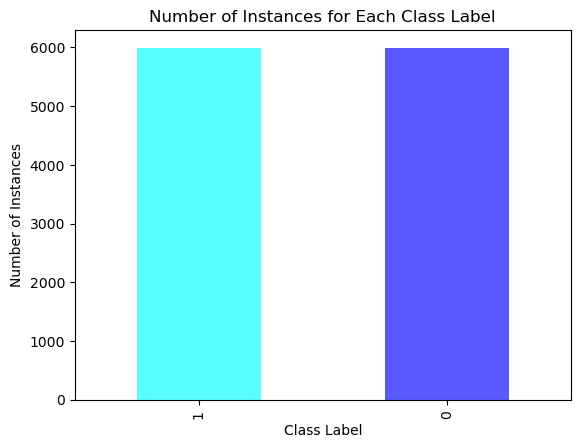

In [77]:
# Provide a bar plot showing the number of instances for each class label
cmap = plt.get_cmap('viridis')

class_counts = train_labels.value_counts()
class_counts.plot(kind='bar', color=['cyan', 'blue'], alpha=0.65)

plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.title('Number of Instances for Each Class Label')
save_fig("d2_class_label_balance", tight_layout=False)
plt.show()

## Task D3

Plot the first six images/examples from each class with the corresponding example id and associated label on the top of the plot.


In [78]:
# train_set.iloc[0].to_numpy().shape

In [79]:
# train_set.index[0]

### Plot A Single Shoe


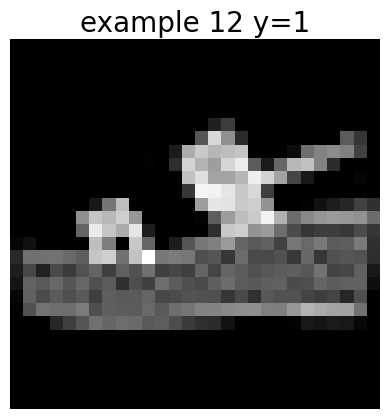

In [80]:
import matplotlib.pyplot as plt



def plot_shoe(image_data, id, label):


    image = image_data.reshape(28, 28)

    title = 'example '+str(id)+' y='+str(label)

    plt.imshow(1-image, cmap="binary")


    plt.axis("off")

    plt.title(title, fontsize=20)



some_shoe = train_set.iloc[0].to_numpy()


plot_shoe(some_shoe, train_set.index[0], train_labels.iloc[0])


plt.show()

### Filter Data

Get data of the first six images/examples from each class.


In [81]:
count = 0
count_0 = 0
count_1 = 0
idx = 0
selected_indices = []
example_ids = []
example_labels = []

while count < 12:
    label = train_labels.iloc[idx]
    if label == 1 and count_1 < 6:
        count += 1
        count_1 += 1
        selected_indices.extend([idx])
        example_ids.extend([train_set.index[idx]])
        example_labels.extend([1])
    elif label == 0 and count_0 < 6:
        count += 1
        count_0 += 1
        selected_indices.extend([idx])
        example_ids.extend([train_set.index[idx]])
        example_labels.extend([0])
    idx += 1

# print(selected_indices)
# print(example_ids)
# print(example_labels)

selected_data = train_set.iloc[selected_indices]
# selected_data

### Plot Shoes


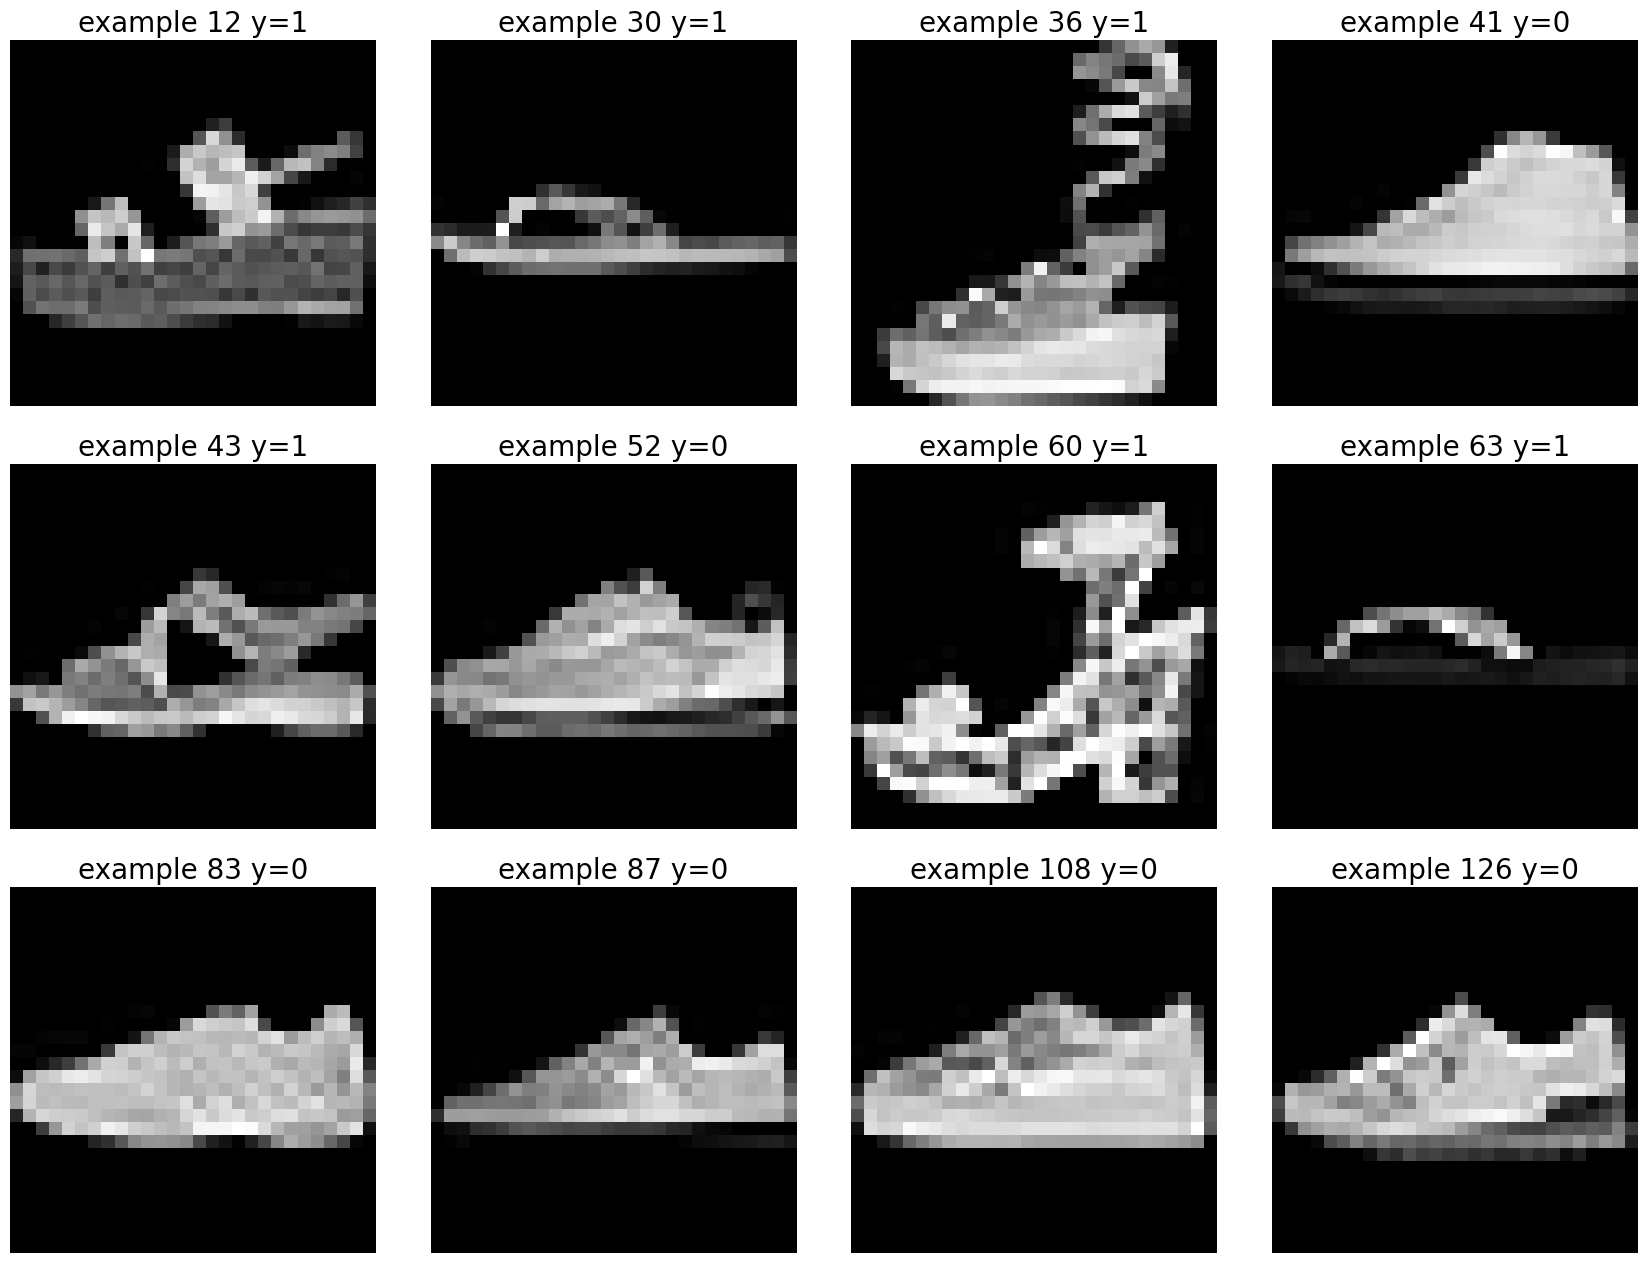

In [82]:
plt.figure(figsize=(21, 16))
for idx, image_data in enumerate(selected_data.to_numpy()):
    plt.subplot(3, 4, idx + 1)
    plot_shoe(image_data, example_ids[idx], example_labels[idx])

plt.subplots_adjust(wspace=0.15, hspace=0.1)
save_fig("d3_shoes_plot", tight_layout=False)
plt.show()

# Implement Logistic Regression from Scratch


## Split Data

Split your training data (that you constructed on “summarising the datasets”) into two sets: training and validation. Select randomly 80% for training and 20% for validation.


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train_set, train_labels, test_size=0.2, random_state=5508)

## Define Logistic Regression Classifier


In [84]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature
from sklearn.metrics import accuracy_score


random.seed(5508)

# Add x0=1 to every instance
X_train_b = add_dummy_feature(X_train)
X_val_b = add_dummy_feature(X_val)


N_EPOCHS = 10000

std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(X_train_b)
x_val_scaled = std_scaler.fit_transform(X_val_b)

In [85]:
# Reference: https://www.kaggle.com/code/sugataghosh/implementing-logistic-regression-from-scratch/notebook
# Reference: https://github.com/casper-hansen/Logistic-Regression-From-Scratch/blob/main/src/logistic_regression/model.py
# Reference: https://atmamani.github.io/projects/ml/implementing-logistic-regression-in-python/
# Reference: https://www.kaggle.com/code/hamzaboulahia/logistic-regression-mnist-classification 
class CustomLogisticRegression():
    def __init__(self, learning_rate):
        self.losses = []
        # explain in report: why accuracy? we have a balanced dataset
        self.train_accuracies = []
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    # Reference: https://stackoverflow.com/questions/40726490/overflow-error-in-pythons-numpy-exp-function
    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1/(1+z)
        else:
            z = np.exp(x)
            return z/(1+z)

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        loss = -(y_true * np.log(y_pred + epsilon) +
                 (1-y_true) * np.log(1 - y_pred + epsilon))
        return np.mean(loss)

    def compute_gradients(self, x, y_true, y_pred, n_samples):
        difference = y_pred-y_true
        return np.matmul(difference, x)/n_samples

    def fit(self, x, y, n_epochs):   # y.shape (m,)   x.shape(m,n)
        n_samples, n_features = x.shape
        self.theta = np.random.rand(n_features)  # (n,)

        for _ in range(n_epochs):
            z = np.matmul(x, self.theta)
            pred = self._sigmoid(z)  # estimate probability
            loss = self.compute_loss(y, pred)
            self.losses.append(loss)
            gradients = self.compute_gradients(x, y, pred, n_samples)
            self.theta -= self.learning_rate*gradients

            class_pred = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, class_pred))

    def predict(self, x):
        threshold = 0.5
        pred = self._sigmoid(np.matmul(x, self.theta))
        class_pred = [1 if p > threshold else 0 for p in pred]
        return np.array(class_pred)

In [88]:
# import numpy as np


# def _sigmoid_function(x):
#     if x >= 0:
#         z = np.exp(-x)
#         return 1/(1+z)
#     else:
#         z = np.exp(x)
#         return z/(1+z)


# def _sigmoid(x):
#     return np.array([_sigmoid_function(value) for value in x])


# def compute_loss(y_true, y_pred):
#     epsilon = 1e-9
#     loss = -(y_true * np.log(y_pred + epsilon) +
#              (1-y_true) * np.log(1 - y_pred + epsilon))
#     return np.mean(loss)


# def compute_gradients(x, y_true, y_pred, n_samples):
#     difference = y_pred-y_true
#     return np.matmul(difference, x)/n_samples


# X, y, w = np.array([[1, 10, 20], [1, -10, 10]]
#                    ), np.array([1, 0]), np.array([1, 0.5, 1.5])


# # sigmoid no problem
# n_samples, n_features = X_train_b.shape
# theta = np.random.rand(n_features)
# # print('theta shape is ', theta.shape)
# z = np.matmul(X, w)
# pred = _sigmoid(z)  # estimate probability
# # print('pred shape is ', pred.shape)
# # pred, loss no problem
# # gradient no problem


# # y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
# # print(f"cost_func({y}, {y_dash}) = {compute_loss(y, y_dash)}")

# print(f"grad_logreg_vec(X = {X}, y = {y}, w = {
#       w}) = {compute_gradients(X, y, pred, 2)}")

grad_logreg_vec(X = [[  1  10  20]
 [  1 -10  10]], y = [1 0], w = [1.  0.5 1.5]) = [ 0.49999165 -4.99991649  4.99991649]


## Task D4

Experiment with some values for η, the learning rate of the gradient descent. Provide
plots to support your decision for the final value and justify your choice.


In [91]:
# Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html
plt.figure(figsize=(15, 9))
plt.figure(1)
plt.figure(figsize=(15, 9))
plt.figure(2)

learning_rates = [0.7, 0.5, 0.2, 0.1]
# + [10**-i for i in range(1, 4)]

for learning_rate in learning_rates:
    model = CustomLogisticRegression(learning_rate)
    model.fit(x_train_scaled, y_train, 10000)
    plt.figure(1)
    plt.plot(range(10000), model.losses, label=str(learning_rate))
    plt.figure(2)
    plt.plot(range(10000), model.train_accuracies, label=str(learning_rate))

plt.figure(1)
plt.legend(loc='upper right')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
save_fig("d4_training_loss", tight_layout=False)
plt.figure(2)
plt.legend(loc='upper left')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Iterations')
save_fig("d4_accuracy", tight_layout=False)
plt.show()

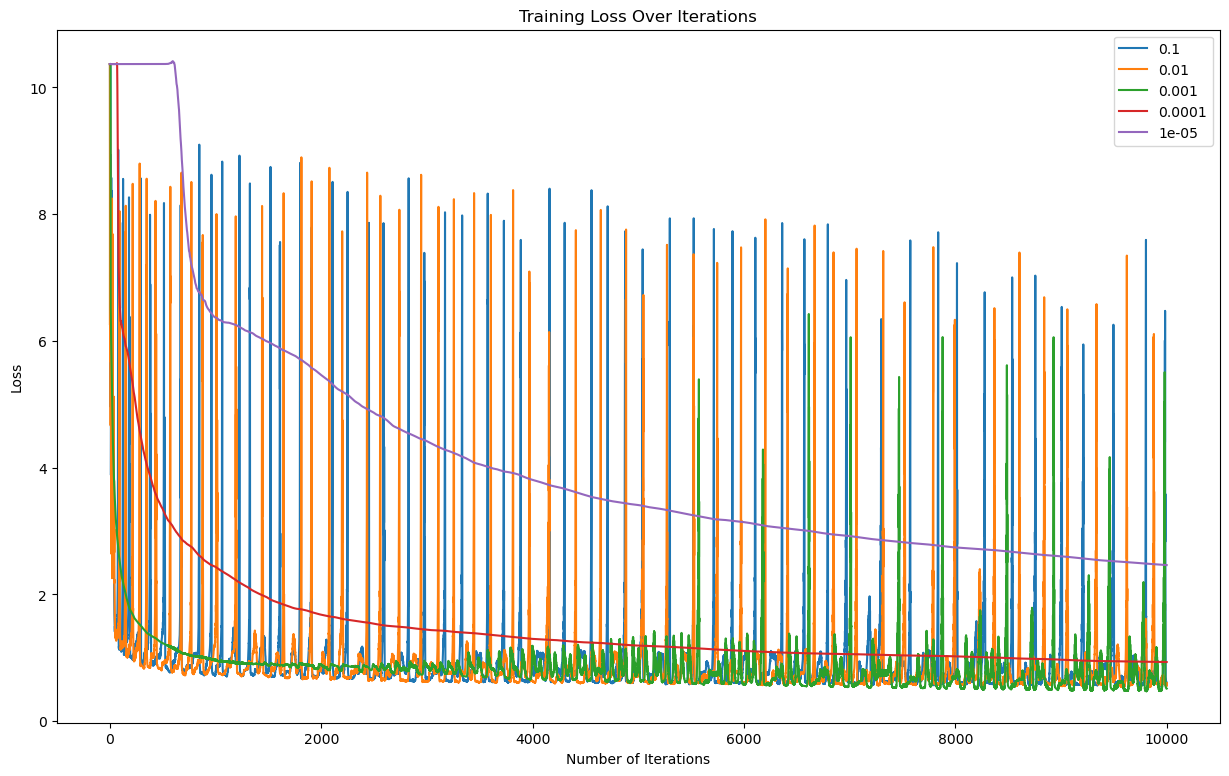

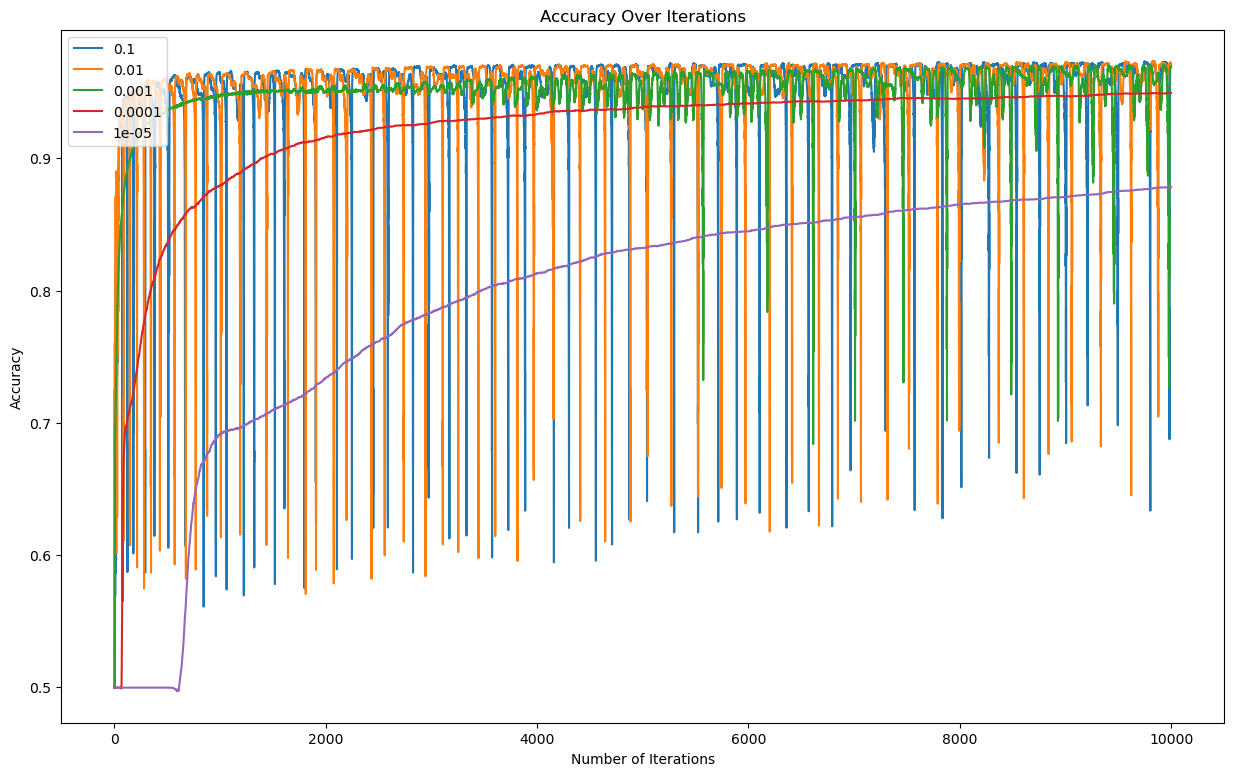

In [89]:
#without scaling the X
# # Reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/multiple_figs_demo.html
# plt.figure(figsize=(15, 9))
# plt.figure(1)
# plt.figure(figsize=(15, 9))
# plt.figure(2)

# for learning_rate in [10**-i for i in range(1, 6)]:
#     model = CustomLogisticRegression(learning_rate)
#     model.fit(X_train_b, y_train, 10000)
#     plt.figure(1)
#     plt.plot(range(10000), model.losses, label=str(learning_rate))
#     plt.figure(2)
#     plt.plot(range(10000), model.train_accuracies, label=str(learning_rate))

# plt.figure(1)
# plt.legend(loc='upper right')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Loss')
# plt.title('Training Loss Over Iterations')
# save_fig("d4_training_loss", tight_layout=False)
# plt.figure(2)
# plt.legend(loc='upper left')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Over Iterations')
# save_fig("d4_accuracy", tight_layout=False)
# plt.show()

## Task D5


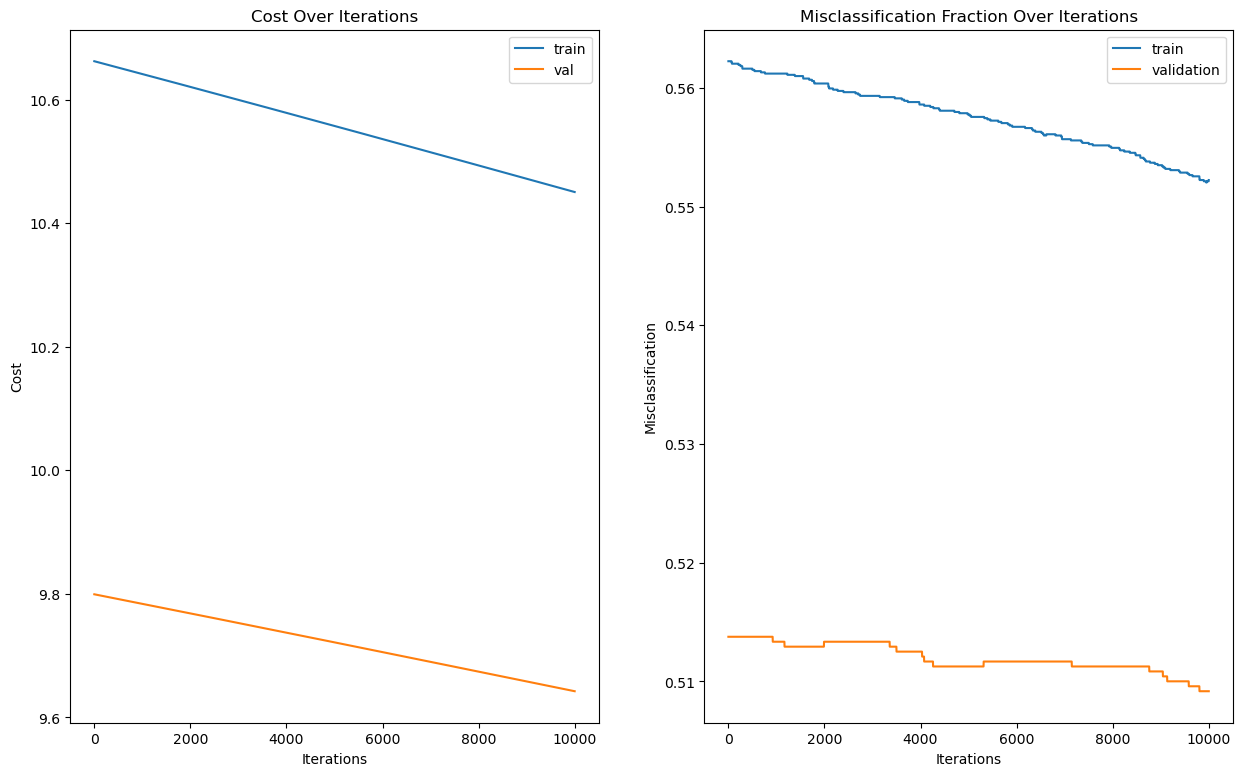

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

model1 = CustomLogisticRegression(1e-5)
model1.fit(x_train_scaled, y_train, 10000)
misclassification = [(1-accuracy) for accuracy in model1.train_accuracies]
ax1.plot(range(10000), model1.losses, label='train')
ax2.plot(range(10000), misclassification, label='train')

model2 = CustomLogisticRegression(1e-5)
model2.fit(x_val_scaled, y_val, 10000)
misclassification = [(1-accuracy) for accuracy in model2.train_accuracies]
ax1.plot(range(10000), model2.losses, label='val')
ax2.plot(range(10000), misclassification, label='validation')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Over Iterations')
ax1.legend(loc='upper right')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Misclassification')
ax2.set_title('Misclassification Fraction Over Iterations')
ax2.legend(loc='upper right')
plt.show()

# Scikit-learn Logistic Regression Classifier
